In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.figsize"] = (12,5)
sns.set()

In [2]:
df = pd.read_csv('AB_NYC_2019.csv')

In [3]:
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

# EDA & Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
df.duplicated().any()

False

In [6]:
df = df.drop(columns=['id', 'name', 'host_id', 'host_name', 'last_review'])
df

neighbourhood_group       neighbourhood  latitude  longitude  \
0                Brooklyn          Kensington  40.64749  -73.97237   
1               Manhattan             Midtown  40.75362  -73.98377   
2               Manhattan              Harlem  40.80902  -73.94190   
3                Brooklyn        Clinton Hill  40.68514  -73.95976   
4               Manhattan         East Harlem  40.79851  -73.94399   
...                   ...                 ...       ...        ...   
48890            Brooklyn  Bedford-Stuyvesant  40.67853  -73.94995   
48891            Brooklyn            Bushwick  40.70184  -73.93317   
48892           Manhattan              Harlem  40.81475  -73.94867   
48893           Manhattan      Hell's Kitchen  40.75751  -73.99112   
48894           Manhattan      Hell's Kitchen  40.76404  -73.98933   

             room_type  price  minimum_nights  number_of_reviews  \
0         Private room    149               1                  9   
1      Entire home/apt    225               1                 45   
2         Private room    150               3                  0   
3      Entire home/apt     89               1                270   
4      Entire home/apt     80              10                  9   
...                ...    ...             ...                ...   
48890     Private room     70               2                  0   
48891     Private room     40               4                  0   
48892  Entire home/apt    115              10                  0   
48893      Shared room     55               1                  0   
48894     Private room     90               7                  0   

       reviews_per_month  calculated_host_listings_count  availability_365  
0                   0.21                               6               365  
1                   0.38                               2               355  
2                    NaN                               1               365  
3                   4.64                               1               194  
4                   0.10                               1                 0  
...                  ...                             ...               ...  
48890                NaN                               2                 9  
48891                NaN                               2                36  
48892                NaN                               1                27  
48893                NaN                               6                 2  
48894                NaN                               1                23  

[48895 rows x 11 columns]

### neighbourhood_group

In [7]:
group_stats = df['neighbourhood_group'].value_counts()
group_stats

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

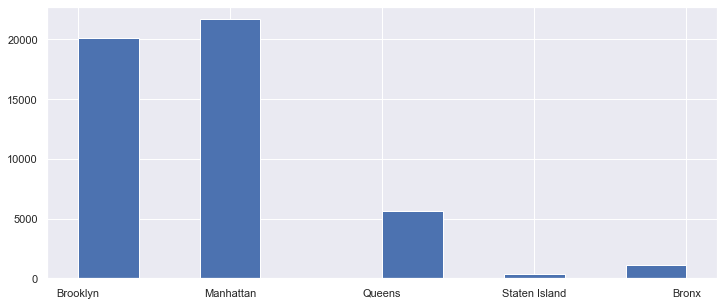

In [8]:
df['neighbourhood_group'].hist();

### neighbourhood

In [9]:
stats = df.groupby(['neighbourhood_group', 'neighbourhood']).size()
bar = '-----------------------------------------------------------'
last_group = ''
for indexes in stats.index:
    group, district = indexes
    if group != last_group:
        last_group = group
        print(bar)
        print(group + ': ' + str(group_stats[group]) + ' total')
    print('\t' + district + '\t:\t' + str(stats[indexes]))

-----------------------------------------------------------
Bronx: 1091 total
	Allerton	:	42
	Baychester	:	7
	Belmont	:	24
	Bronxdale	:	19
	Castle Hill	:	9
	City Island	:	18
	Claremont Village	:	28
	Clason Point	:	21
	Co-op City	:	2
	Concourse	:	50
	Concourse Village	:	32
	East Morrisania	:	10
	Eastchester	:	13
	Edenwald	:	13
	Fieldston	:	12
	Fordham	:	63
	Highbridge	:	27
	Hunts Point	:	18
	Kingsbridge	:	70
	Longwood	:	62
	Melrose	:	10
	Morris Heights	:	17
	Morris Park	:	15
	Morrisania	:	18
	Mott Haven	:	60
	Mount Eden	:	6
	Mount Hope	:	20
	North Riverdale	:	10
	Norwood	:	31
	Olinville	:	4
	Parkchester	:	39
	Pelham Bay	:	17
	Pelham Gardens	:	28
	Port Morris	:	46
	Riverdale	:	11
	Schuylerville	:	13
	Soundview	:	15
	Spuyten Duyvil	:	4
	Throgs Neck	:	24
	Tremont	:	11
	Unionport	:	7
	University Heights	:	21
	Van Nest	:	11
	Wakefield	:	50
	West Farms	:	2
	Westchester Square	:	10
	Williamsbridge	:	40
	Woodlawn	:	11
-----------------------------------------------------------
Brooklyn: 20104 t

### room_type

In [10]:
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

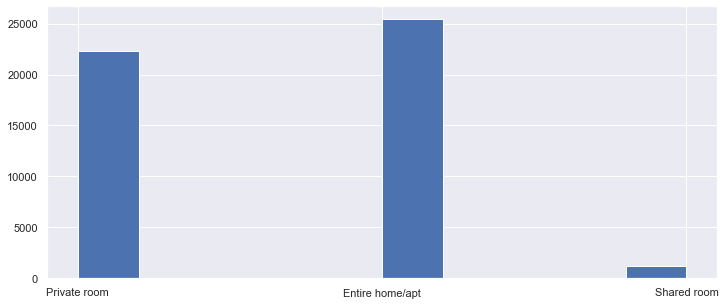

In [11]:
df['room_type'].hist();

### minimum_nights

In [12]:
df[df['minimum_nights'] == 0].shape[0] / df.shape[0]

0.0

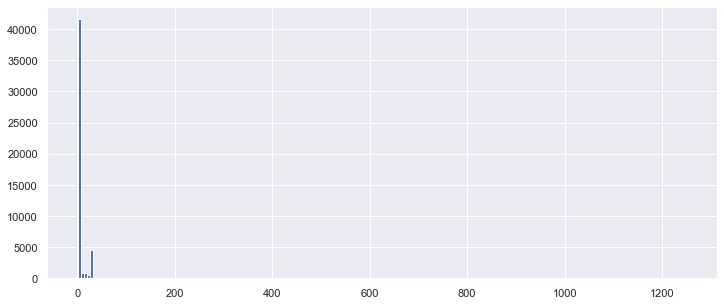

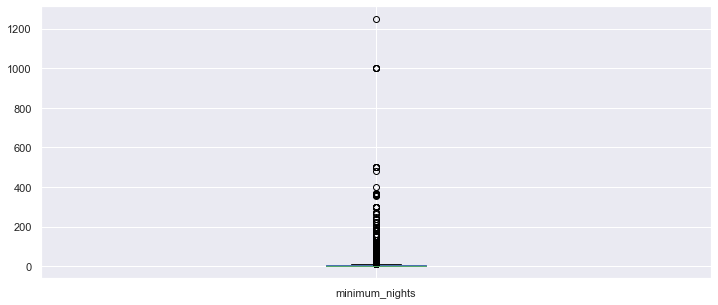

In [13]:
df['minimum_nights'].hist(bins=200)
plt.figure()
df['minimum_nights'].plot.box();

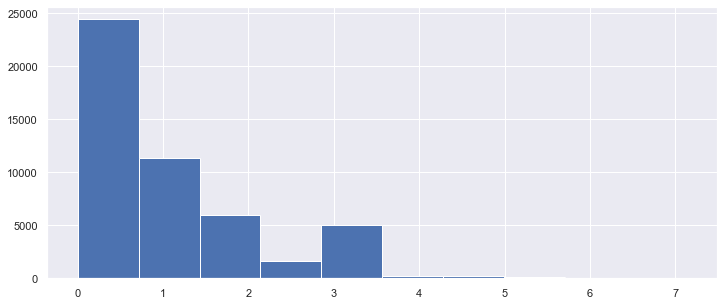

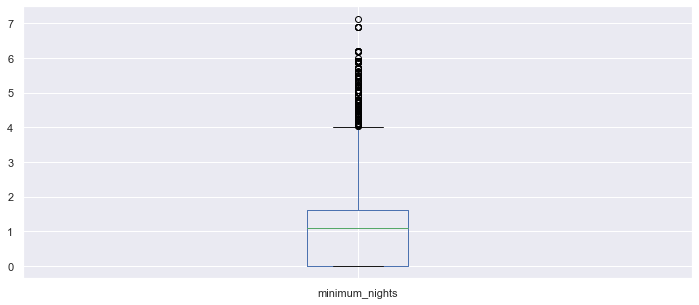

In [14]:
minimum_nights_log = np.log(df['minimum_nights'])
minimum_nights_log.hist()
plt.figure()
minimum_nights_log.plot.box();

In [15]:
df['minimum_nights_log'] = minimum_nights_log

### number_of_reviews

In [16]:
df[df['number_of_reviews'] == 0].shape[0] / df.shape[0]

0.20558339298496778

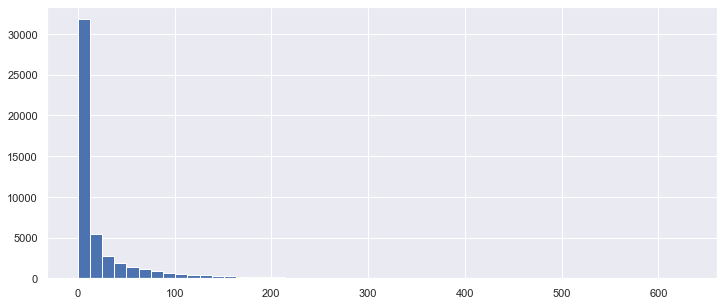

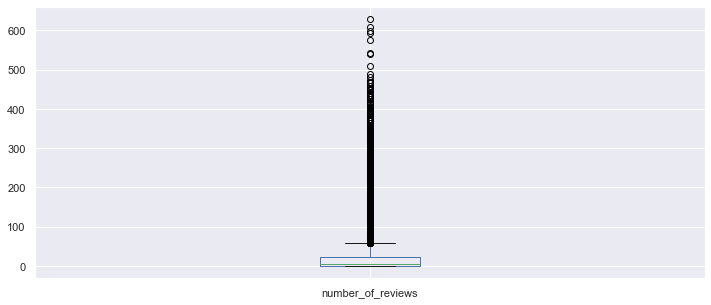

In [17]:
df['number_of_reviews'].hist(bins=50);
plt.figure()
df['number_of_reviews'].plot.box();

### reviews_per_month

In [18]:
df['reviews_per_month'].isna().sum()

10052

In [19]:
df['reviews_per_month'].fillna(0, inplace=True)

In [20]:
(df['reviews_per_month'] == 0).sum() / df.shape[0]

0.20558339298496778

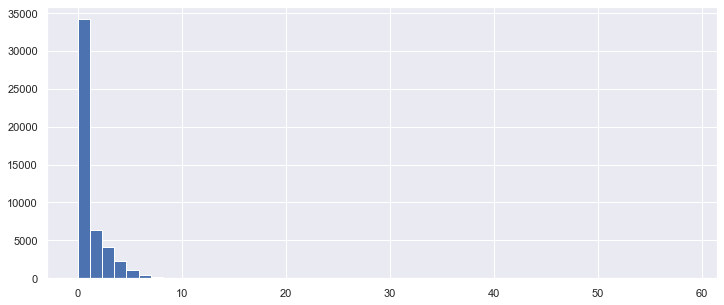

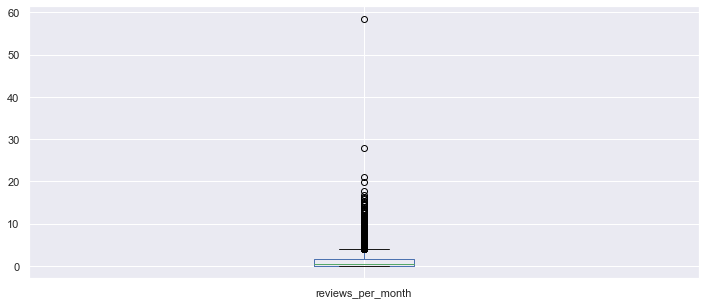

In [21]:
df['reviews_per_month'].hist(bins=50);
plt.figure()
df['reviews_per_month'].plot.box();

### calculated_host_listings_count

In [22]:
df['calculated_host_listings_count'].isna().sum()

0

In [23]:
(df['calculated_host_listings_count'] == 0).sum() / df.shape[0]

0.0

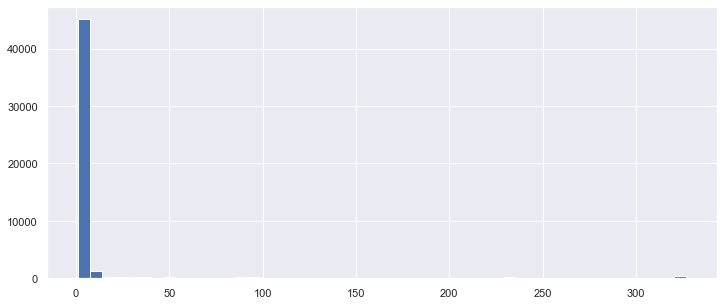

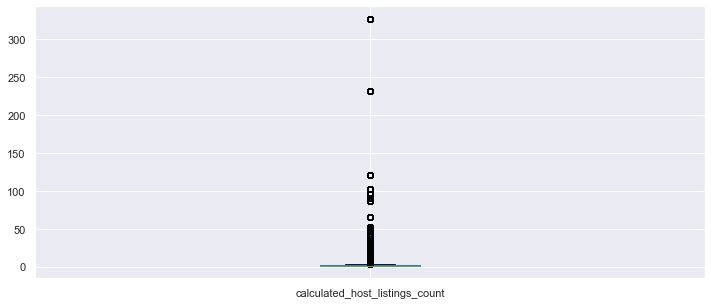

In [24]:
df['calculated_host_listings_count'].hist(bins=50);
plt.figure()
df['calculated_host_listings_count'].plot.box();

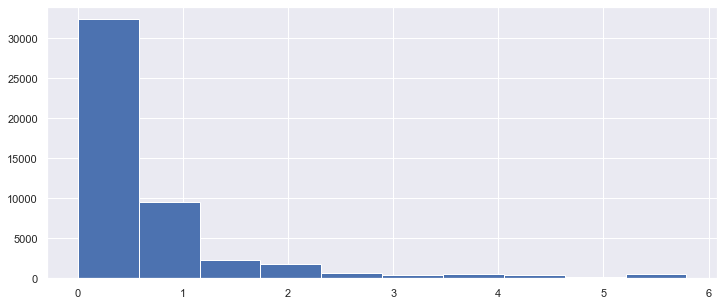

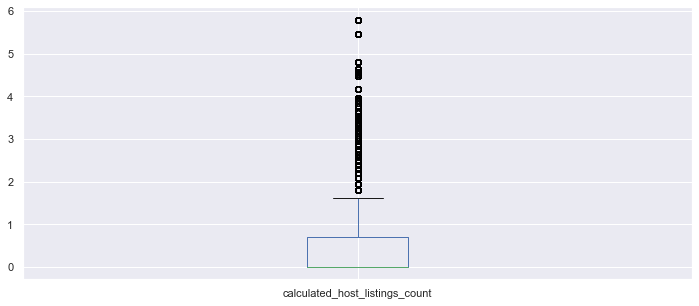

In [25]:
calculated_host_listings_count_log = np.log(df['calculated_host_listings_count'])
calculated_host_listings_count_log.hist()
plt.figure()
calculated_host_listings_count_log.plot.box();

In [26]:
df['calculated_host_listings_count_log'] = calculated_host_listings_count_log

### availability_365

In [27]:
df['availability_365'].isna().sum()

0

In [28]:
(df['availability_365'] == 0).sum() / df.shape[0]

0.35858472236424993

#### некоторые помещения доступны для аренды 0 дней в году??

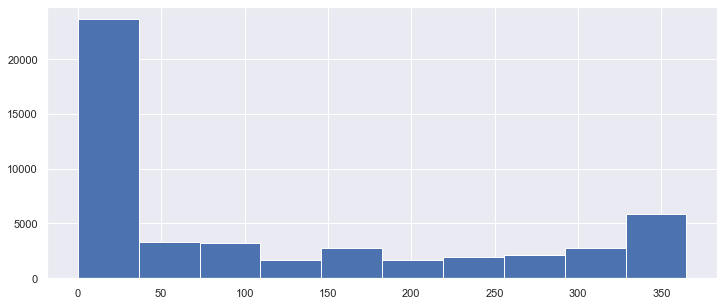

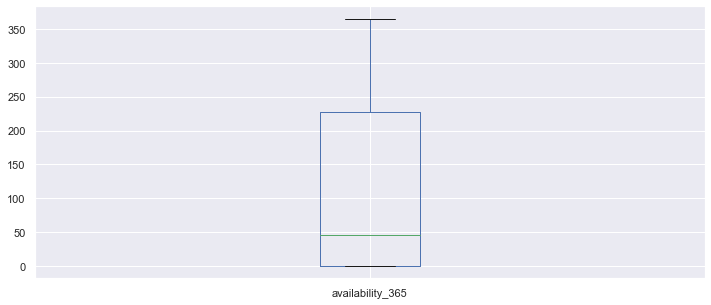

In [29]:
df['availability_365'].hist();
plt.figure()
df['availability_365'].plot.box();

In [30]:
df.drop(columns='availability_365', inplace=True)

### price

In [31]:
df['price'].isna().sum()

0

In [32]:
(df['price'] == 0).sum() / df.shape[0]

0.0002249718785151856

#### Бесплатная аренда? Скорее всего выбросы

In [33]:
df = df.loc[~df['price'].isin([0])]

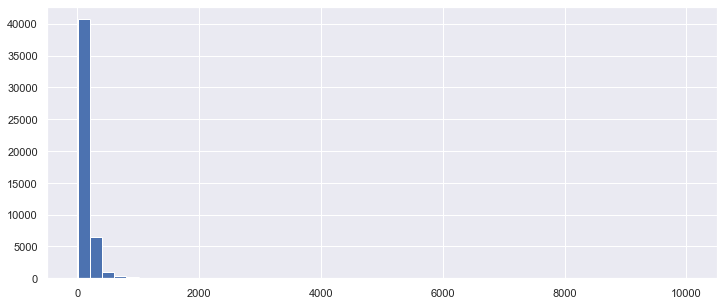

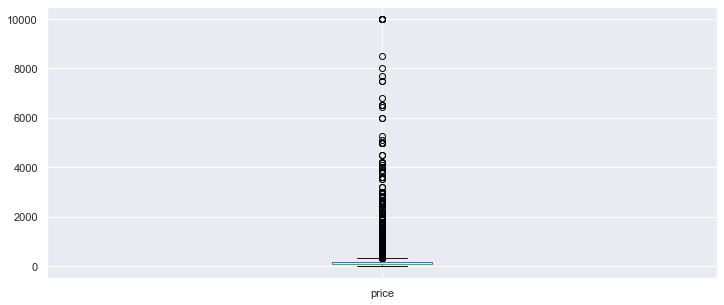

In [34]:
df['price'].hist(bins=50);
plt.figure()
df['price'].plot.box();

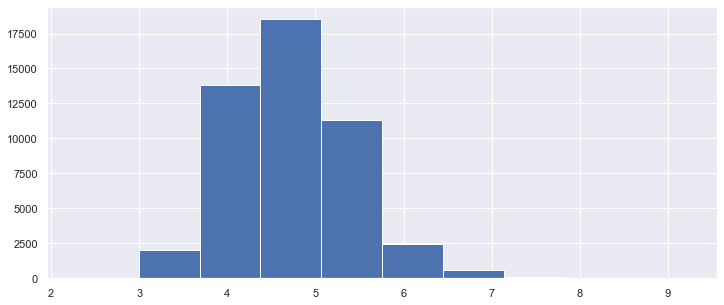

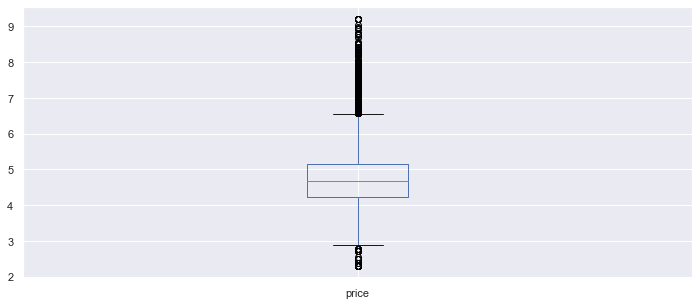

In [35]:
price_log = np.log(df['price'])
price_log.hist()
plt.figure()
price_log.plot.box();

In [36]:
df['price_log'] = price_log

### Корреляция

In [37]:
## удалим те столбцы, для которых есть логарифмированные
df.drop(columns=['calculated_host_listings_count', 'minimum_nights', 'price'], inplace=True)

In [38]:
def find_best_corr(corr, barrier=0.8):
    best_corr_list = []
    for i in range(corr.shape[0]):
        for j in range(i+1, corr.shape[1]):
            if corr.iloc[i,j] > barrier:
                best_corr_list.append((corr.index[i], corr.columns[j], corr.iloc[i,j]))
    best_corr_list.sort(key=lambda x: x[2], reverse=True)
    return best_corr_list

[('number_of_reviews', 'reviews_per_month', 0.5893112390703805)]

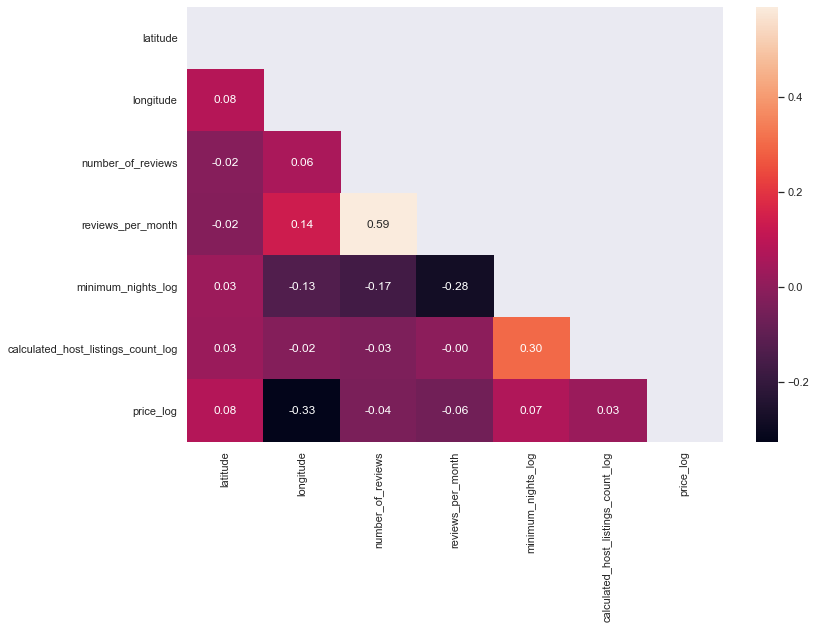

In [39]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt='.2f', mask=mask)
find_best_corr(corr, barrier=0.5)

# Feature Engeneering

#### Не вижу смысла кодировать neighbourhood_group и neighbourhood. Метрика расстояние от манхэттена, будет лучше всего отражать метоположение

In [40]:
manhattan_latitude = 40.78343
manhattan_longitude = -73.96625

df['distance'] = df[['latitude', 'longitude']].apply(lambda x: np.sqrt( (manhattan_latitude - x[0])**2 + (manhattan_longitude - x[1])**2 ), axis=1)
df

neighbourhood_group       neighbourhood  latitude  longitude  \
0                Brooklyn          Kensington  40.64749  -73.97237   
1               Manhattan             Midtown  40.75362  -73.98377   
2               Manhattan              Harlem  40.80902  -73.94190   
3                Brooklyn        Clinton Hill  40.68514  -73.95976   
4               Manhattan         East Harlem  40.79851  -73.94399   
...                   ...                 ...       ...        ...   
48890            Brooklyn  Bedford-Stuyvesant  40.67853  -73.94995   
48891            Brooklyn            Bushwick  40.70184  -73.93317   
48892           Manhattan              Harlem  40.81475  -73.94867   
48893           Manhattan      Hell's Kitchen  40.75751  -73.99112   
48894           Manhattan      Hell's Kitchen  40.76404  -73.98933   

             room_type  number_of_reviews  reviews_per_month  \
0         Private room                  9               0.21   
1      Entire home/apt                 45               0.38   
2         Private room                  0               0.00   
3      Entire home/apt                270               4.64   
4      Entire home/apt                  9               0.10   
...                ...                ...                ...   
48890     Private room                  0               0.00   
48891     Private room                  0               0.00   
48892  Entire home/apt                  0               0.00   
48893      Shared room                  0               0.00   
48894     Private room                  0               0.00   

       minimum_nights_log  calculated_host_listings_count_log  price_log  \
0                0.000000                            1.791759   5.003946   
1                0.000000                            0.693147   5.416100   
2                1.098612                            0.000000   5.010635   
3                0.000000                            0.000000   4.488636   
4                2.302585                            0.000000   4.382027   
...                   ...                                 ...        ...   
48890            0.693147                            0.693147   4.248495   
48891            1.386294                            0.693147   3.688879   
48892            2.302585                            0.000000   4.744932   
48893            0.000000                            1.791759   4.007333   
48894            1.945910                            0.000000   4.499810   

       distance  
0      0.136078  
1      0.034577  
2      0.035324  
3      0.098504  
4      0.026887  
...         ...  
48890  0.106159  
48891  0.088041  
48892  0.035917  
48893  0.035922  
48894  0.030144  

[48884 rows x 11 columns]

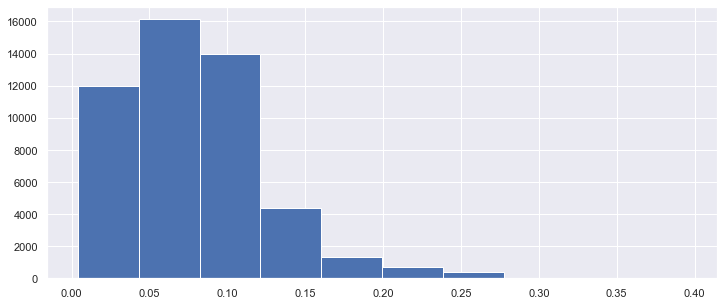

In [41]:
df['distance'].hist()

#### encoding 'room_type'

In [46]:
# one hot encoding
# df = pd.concat([df, pd.get_dummies(df['room_type']], axis=1)

# Catboost энкодинг
import category_encoders as ce
df = ce.CatBoostEncoder(cols=['room_type']).fit_transform(df, df['price_log'])

df

neighbourhood_group       neighbourhood  latitude  longitude  room_type  \
0                Brooklyn          Kensington  40.64749  -73.97237   4.727031   
1               Manhattan             Midtown  40.75362  -73.98377   4.727031   
2               Manhattan              Harlem  40.80902  -73.94190   4.865489   
3                Brooklyn        Clinton Hill  40.68514  -73.95976   5.071566   
4               Manhattan         East Harlem  40.79851  -73.94399   4.877256   
...                   ...                 ...       ...        ...        ...   
48890            Brooklyn  Bedford-Stuyvesant  40.67853  -73.94995   4.296083   
48891            Brooklyn            Bushwick  40.70184  -73.93317   4.296081   
48892           Manhattan              Harlem  40.81475  -73.94867   5.140924   
48893           Manhattan      Hell's Kitchen  40.75751  -73.99112   3.953398   
48894           Manhattan      Hell's Kitchen  40.76404  -73.98933   4.296054   

       number_of_reviews  reviews_per_month  minimum_nights_log  \
0                      9               0.21            0.000000   
1                     45               0.38            0.000000   
2                      0               0.00            1.098612   
3                    270               4.64            0.000000   
4                      9               0.10            2.302585   
...                  ...                ...                 ...   
48890                  0               0.00            0.693147   
48891                  0               0.00            1.386294   
48892                  0               0.00            2.302585   
48893                  0               0.00            0.000000   
48894                  0               0.00            1.945910   

       calculated_host_listings_count_log  price_log  distance  
0                                1.791759   5.003946  0.136078  
1                                0.693147   5.416100  0.034577  
2                                0.000000   5.010635  0.035324  
3                                0.000000   4.488636  0.098504  
4                                0.000000   4.382027  0.026887  
...                                   ...        ...       ...  
48890                            0.693147   4.248495  0.106159  
48891                            0.693147   3.688879  0.088041  
48892                            0.000000   4.744932  0.035917  
48893                            1.791759   4.007333  0.035922  
48894                            0.000000   4.499810  0.030144  

[48884 rows x 11 columns]

In [47]:
df.drop(columns=['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude'], inplace=True)
df

room_type  number_of_reviews  reviews_per_month  minimum_nights_log  \
0       4.727031                  9               0.21            0.000000   
1       4.727031                 45               0.38            0.000000   
2       4.865489                  0               0.00            1.098612   
3       5.071566                270               4.64            0.000000   
4       4.877256                  9               0.10            2.302585   
...          ...                ...                ...                 ...   
48890   4.296083                  0               0.00            0.693147   
48891   4.296081                  0               0.00            1.386294   
48892   5.140924                  0               0.00            2.302585   
48893   3.953398                  0               0.00            0.000000   
48894   4.296054                  0               0.00            1.945910   

       calculated_host_listings_count_log  price_log  distance  
0                                1.791759   5.003946  0.136078  
1                                0.693147   5.416100  0.034577  
2                                0.000000   5.010635  0.035324  
3                                0.000000   4.488636  0.098504  
4                                0.000000   4.382027  0.026887  
...                                   ...        ...       ...  
48890                            0.693147   4.248495  0.106159  
48891                            0.693147   3.688879  0.088041  
48892                            0.000000   4.744932  0.035917  
48893                            1.791759   4.007333  0.035922  
48894                            0.000000   4.499810  0.030144  

[48884 rows x 7 columns]

[('room_type', 'price_log', 0.6219226635143319),
 ('number_of_reviews', 'reviews_per_month', 0.5893112390703805)]

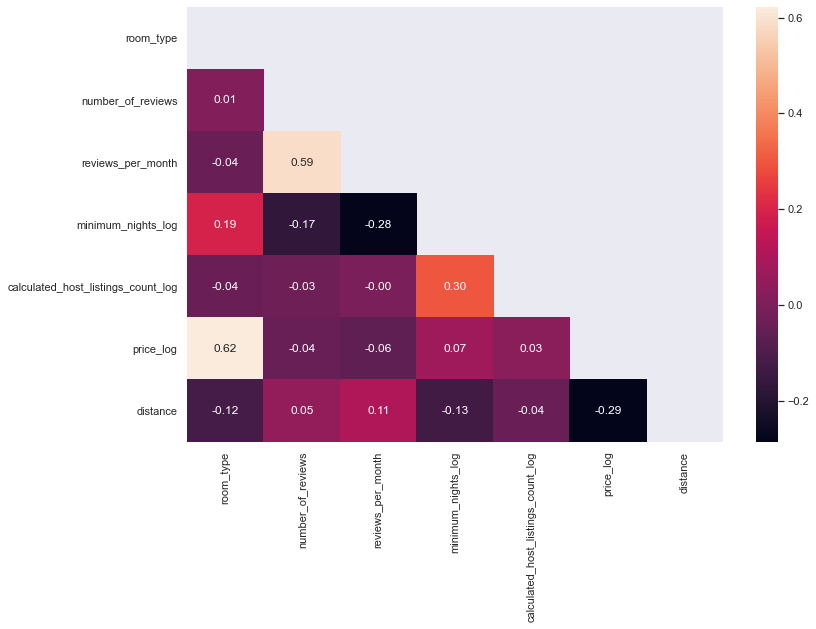

In [48]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt='.2f', mask=mask)
find_best_corr(corr, barrier=0.5)

#### целевая переменная более менее коррелирует только с расстоянием. Также по логике при расчете цены нужно будет учитывать room_type

In [49]:
# df.drop(columns=['number_of_reviews', 'reviews_per_month', 'minimum_nights_log', 'calculated_host_listings_count_log'], inplace=True)

# ML

In [50]:
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics  # подгружаем метрики

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def dataframe_metrics(y_test,y_pred):
    stats = [
       metrics.mean_absolute_error(y_test, y_pred),
       np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
       metrics.r2_score(y_test, y_pred),
       mean_absolute_percentage_error(y_test, y_pred)
    ]
    return stats


measured_metrics = pd.DataFrame({"error_type":["MAE", "RMSE", "R2", "MAPE"]})
measured_metrics.set_index("error_type")

Empty DataFrame
Columns: []
Index: [MAE, RMSE, R2, MAPE]

In [51]:
from sklearn.preprocessing import StandardScaler

class StandardScalerDf(StandardScaler):
    """
    DataFrame Wrapper around StandardScaler
    http://flennerhag.com/2017-01-08-Recursive-Override/
    """
    def __init__(self, copy=True, with_mean=True, with_std=True):
        super(StandardScalerDf, self).__init__(copy=copy,
                                               with_mean=with_mean,
                                               with_std=with_std)

    def transform(self, X, y=None):
        z = super(StandardScalerDf, self).transform(X.values)
        return pd.DataFrame(z, index=X.index, columns=X.columns)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(
    # df.drop(['price_log', 'Entire home/apt', 'Private room', 'Shared room'], axis=1), 
    # df.drop(['price_log'], axis=1), 
    df.drop(['price_log', 'number_of_reviews', 'reviews_per_month', 'minimum_nights_log', 'calculated_host_listings_count_log'], axis=1), 
    df['price_log'], 
    test_size=0.3
)

In [63]:
y_median = np.median(y_train)                   
y_pred_naive = np.ones(len(y_test)) * y_median

measured_metrics['naive_baseline'] = dataframe_metrics(y_test, y_pred_naive)
measured_metrics

error_type  naive_baseline        lr  lasso_cv  ridge_cv  elastic_cv
0        MAE        0.556243  0.379270  0.379267  0.379272    0.379270
1       RMSE        0.705743  0.522441  0.522446  0.522441    0.522447
2         R2       -0.010719  0.442504  0.442492  0.442504    0.442491
3       MAPE       11.833373  8.009155  8.009179  8.009237    8.009309

In [64]:
scaler = StandardScalerDf()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [65]:
np.set_printoptions(precision=3)

In [66]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
measured_metrics['lr'] = dataframe_metrics(y_test, lr.predict(X_test_scaled))

lasso_cv = LassoCV()
lasso_cv.fit(X_train_scaled, y_train)
measured_metrics['lasso_cv'] = dataframe_metrics(y_test, lasso_cv.predict(X_test_scaled))

ridge_cv = RidgeCV()
ridge_cv.fit(X_train_scaled, y_train)
measured_metrics['ridge_cv'] = dataframe_metrics(y_test, ridge_cv.predict(X_test_scaled))

elastic_cv = ElasticNetCV()
elastic_cv.fit(X_train_scaled, y_train)
measured_metrics['elastic_cv'] = dataframe_metrics(y_test, elastic_cv.predict(X_test_scaled))

measured_metrics

error_type  naive_baseline        lr  lasso_cv  ridge_cv  elastic_cv
0        MAE        0.556243  0.387492  0.387499  0.387492    0.387500
1       RMSE        0.705743  0.527798  0.527805  0.527798    0.527807
2         R2       -0.010719  0.434707  0.434693  0.434706    0.434687
3       MAPE       11.833373  8.183586  8.183958  8.183593    8.184069

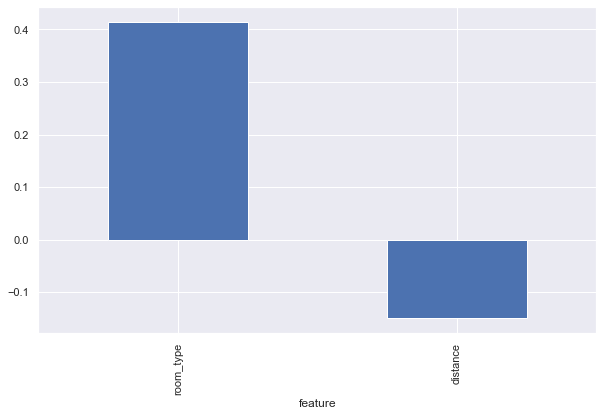

In [67]:
featureImportance = pd.DataFrame({"feature": X_train.columns, 
                                  "importance": lr.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot(kind='bar', figsize=(10, 6));

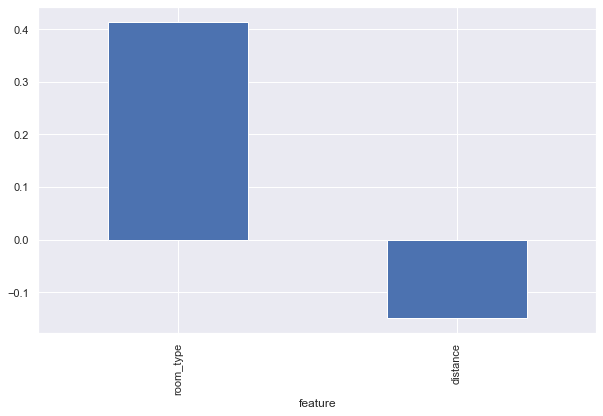

In [68]:
featureImportance = pd.DataFrame({"feature": X_train.columns[lasso_cv.coef_!=0], 
                                  "importance": lasso_cv.coef_[lasso_cv.coef_!=0]})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot(kind='bar', figsize=(10, 6));

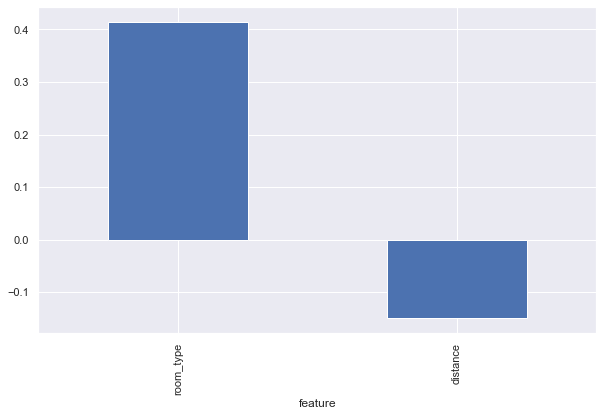

In [69]:
featureImportance = pd.DataFrame({"feature": X_train.columns[ridge_cv.coef_!=0], 
                                  "importance": ridge_cv.coef_[ridge_cv.coef_!=0]})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot(kind='bar', figsize=(10, 6));

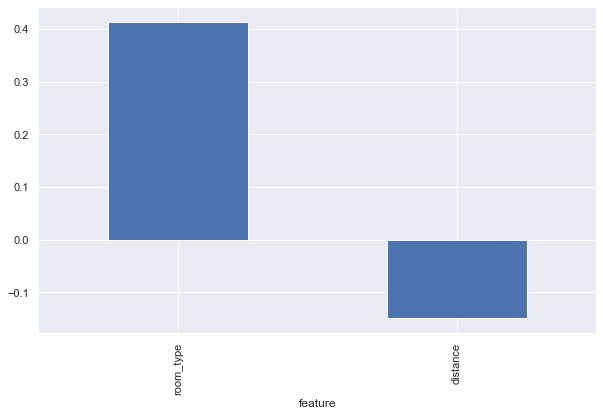

In [70]:
featureImportance = pd.DataFrame({"feature": X_train.columns[elastic_cv.coef_!=0], 
                                  "importance": elastic_cv.coef_[elastic_cv.coef_!=0]})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot(kind='bar', figsize=(10, 6));